# MONISH KANNA SURESH - 20012129
# RASHI WASE - 20011374
# AKSHITHA REVU - 20011360



# PROJECT TITLE : ANDROID HEALTH CHECK

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# LOADING THE DATASET AND VIEWING IT

In [5]:
dataset=pd.read_csv("Dataset.csv")

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
dataset.head(10)

transact  onServiceConnected  bindService  attachInterface  \
0       0.0                 1.0          1.0              0.0   
1       0.0                 0.0          0.0              0.0   
2       0.0                 0.0          0.0              0.0   
3       0.0                 1.0          1.0              0.0   
4       0.0                 0.0          0.0              0.0   
5       0.0                 0.0          0.0              0.0   
6       1.0                 0.0          0.0              0.0   
7       0.0                 0.0          0.0              0.0   
8       0.0                 0.0          0.0              0.0   
9       0.0                 1.0          1.0              0.0   

   ServiceConnection  android.os.Binder  SEND_SMS  \
0                1.0                0.0       0.0   
1                0.0                0.0       0.0   
2                0.0                0.0       1.0   
3                1.0                1.0       0.0   
4                0.0                1.0       1.0   
5                0.0                0.0       1.0   
6                0.0                0.0       0.0   
7                0.0                0.0       1.0   
8                0.0                0.0       NaN   
9                1.0                1.0       0.0   

   Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                0.0                          0.0   
1                                0.0                          0.0   
2                                0.0                          0.0   
3                                0.0                          0.0   
4                                0.0                          0.0   
5                                0.0                          0.0   
6                                0.0                          0.0   
7                                0.0                          0.0   
8                                0.0                          0.0   
9                                0.0                          0.0   

   Ljava.lang.Class.cast  Ljava.net.URLDecoder  android.content.pm.Signature  \
0                    0.0                   0.0                           1.0   
1                    0.0                   0.0                           0.0   
2                    0.0                   0.0                           0.0   
3                    0.0                   0.0                           0.0   
4                    0.0                   0.0                           0.0   
5                    0.0                   0.0                           0.0   
6                    0.0                   0.0                           0.0   
7                    0.0                   0.0                           0.0   
8                    0.0                   0.0                           0.0   
9                    0.0                   0.0                           0.0   

   android.telephony.SmsManager  READ_PHONE_STATE  getBinder  ClassLoader  \
0                           0.0               1.0        0.0          1.0   
1                           0.0               1.0        0.0          0.0   
2                           1.0               1.0        0.0          0.0   
3                           0.0               1.0        0.0          0.0   
4                           1.0               1.0        0.0          1.0   
5                           1.0               1.0        0.0          0.0   
6                           0.0               1.0        0.0          1.0   
7                           1.0               1.0        0.0          0.0   
8                           0.0               1.0        0.0          0.0   
9                           0.0               1.0        0.0          0.0   

   Landroid.content.Context.registerReceiver  Ljava.lang.Class.getField  \
0                                        0.0                        0.0   
1                                        0.0                    

In [8]:
dataset.tail(10)

transact  onServiceConnected  bindService  attachInterface  \
16290       0.0                 0.0          0.0              0.0   
16291       0.0                 0.0          0.0              0.0   
16292       0.0                 1.0          1.0              0.0   
16293       1.0                 1.0          1.0              1.0   
16294       1.0                 1.0          1.0              0.0   
16295       0.0                 1.0          1.0              0.0   
16296       1.0                 1.0          1.0              1.0   
16297       0.0                 0.0          0.0              0.0   
16298       1.0                 1.0          1.0              1.0   
16299       1.0                 1.0          1.0              1.0   

       ServiceConnection  android.os.Binder  SEND_SMS  \
16290                0.0                0.0       0.0   
16291                0.0                0.0       0.0   
16292                1.0                0.0       0.0   
16293                1.0                1.0       1.0   
16294                1.0                1.0       1.0   
16295                1.0                0.0       0.0   
16296                1.0                1.0       0.0   
16297                0.0                0.0       0.0   
16298                1.0                1.0       0.0   
16299                1.0                1.0       0.0   

       Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
16290                                0.0                          0.0   
16291                                1.0                          0.0   
16292                                1.0                          1.0   
16293                                1.0                          0.0   
16294                                1.0                          1.0   
16295                                0.0                          0.0   
16296                                1.0                          1.0   
16297                                0.0                          1.0   
16298                                0.0                          0.0   
16299                                1.0                          1.0   

       Ljava.lang.Class.cast  Ljava.net.URLDecoder  \
16290                    0.0                   1.0   
16291                    0.0                   1.0   
16292                    0.0                   1.0   
16293                    0.0                   1.0   
16294                    0.0                   1.0   
16295                    0.0                   1.0   
16296                    1.0                   1.0   
16297                    0.0                   1.0   
16298                    0.0                   0.0   
16299                    1.0                   1.0   

       android.content.pm.Signature  android.telephony.SmsManager  \
16290                           0.0                           0.0   
16291                           0.0                           0.0   
16292                           1.0                           0.0   
16293                           1.0                           1.0   
16294                           1.0                           0.0   
16295                           0.0                           0.0   
16296                           1.0                           0.0   
16297                           0.0                           0.0   
16298                           0.0                           0.0   
16299                           1.0                           0.0   

       READ_PHONE_STATE  getBinder  ClassLoader  \
16290               0.0        0.0          0.0   
16291               1.0        0.0          1.0   
16292               0.0        0.0          1.0   
16293               1.0        1.0          1.0   
16294               1.0        0.0          1.0   
16295               1.0        1.0          0.0   
16296               0.0        1.0          1.0   
16297               0.0        0.0          1.0   
1

# CALCULATING THE FEATURES AND COUNT OF ENTRIES IN DATASET

In [9]:
dataset.shape

(16300, 216)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16300 entries, 0 to 16299
Columns: 216 entries, transact to class
dtypes: float64(79), int64(134), object(3)
memory usage: 26.9+ MB


# DATA ANALYSIS

In [11]:
dataset.describe()

transact  onServiceConnected   bindService  attachInterface  \
count  16299.000000        16297.000000  16296.000000     16291.000000   
mean       0.424934            0.373320      0.373895         0.360813   
std        0.494348            0.483701      0.483851         0.480251   
min        0.000000            0.000000      0.000000         0.000000   
25%        0.000000            0.000000      0.000000         0.000000   
50%        0.000000            0.000000      0.000000         0.000000   
75%        1.000000            1.000000      1.000000         1.000000   
max        1.000000            1.000000      1.000000         1.000000   

       ServiceConnection  android.os.Binder      SEND_SMS  \
count       16290.000000       16294.000000  16296.000000   
mean            0.376489           0.402664      0.381996   
std             0.484520           0.490449      0.485890   
min             0.000000           0.000000      0.000000   
25%             0.000000           0.000000      0.000000   
50%             0.000000           0.000000      0.000000   
75%             1.000000           1.000000      1.000000   
max             1.000000           1.000000      1.000000   

       Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
count                       16287.000000                 16297.000000   
mean                            0.001351                     0.000982   
std                             0.036729                     0.031319   
min                             0.000000                     0.000000   
25%                             0.000000                     0.000000   
50%                             0.000000                     0.000000   
75%                             0.000000                     0.000000   
max                             1.000000                     1.000000   

       Ljava.lang.Class.cast  Ljava.net.URLDecoder  \
count           16290.000000          16298.000000   
mean                0.001535              0.002086   
std                 0.039146              0.045628   
min                 0.000000              0.000000   
25%                 0.000000              0.000000   
50%                 0.000000              0.000000   
75%                 0.000000              0.000000   
max                 1.000000              1.000000   

       android.content.pm.Signature  android.telephony.SmsManager  \
count                  16293.000000                  16292.000000   
mean                       0.273001                      0.214829   
std                        0.445515                      0.410717   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%                        0.000000                      0.000000   
75%                        1.000000                      0.000000   
max                        1.000000                      1.000000   

       READ_PHONE_STATE     getBinder   ClassLoader  \
count      16297.000000  16298.000000  16294.000000   
mean           0.754127      0.305007      0.568921   
std            0.430617      0.460424      0.495242   
min            0.000000      0.000000      0.000000   
25%            1.000000      0.000000      0.000000   
50%            1.000000      0.000000      1.000000   
75%            1.000000      1.000000      1.000000   
max            1.000000      1.000000      1.000000   

       Landroid.content.Context.registerReceiver  Ljava.lang.Class.getField  \
count                               16290.000000               16293.000000   
mean                                    0.002947                   0.003253   
std                                     0.054204                   0.056943   
min                                     0.000000                   0.000000   
25%                                     0.000000                   0.000000   
50%                                     0.000000         

In [12]:
dataset.corr()

transact  onServiceConnected  \
transact                                         1.000000            0.796001   
onServiceConnected                               0.796001            1.000000   
bindService                                      0.801078            0.983348   
attachInterface                                  0.872208            0.895455   
ServiceConnection                                0.797899            0.982732   
android.os.Binder                                0.806874            0.914453   
SEND_SMS                                        -0.224290           -0.309837   
Ljava.lang.Class.getCanonicalName                0.008950            0.016531   
Ljava.lang.Class.getMethods                      0.012687            0.024415   
Ljava.lang.Class.cast                            0.010691            0.015112   
Ljava.net.URLDecoder                             0.001498            0.011971   
android.content.pm.Signature                     0.675293            0.745362   
android.telephony.SmsManager                    -0.136648           -0.264796   
READ_PHONE_STATE                                -0.266356           -0.303132   
getBinder                                        0.760906            0.852558   
ClassLoader                                      0.529335            0.562136   
Landroid.content.Context.registerReceiver       -0.007798           -0.002165   
Ljava.lang.Class.getField                       -0.007699            0.000458   
Landroid.content.Context.unregisterReceiver      0.007118            0.012301   
GET_ACCOUNTS                                     0.387832            0.403689   
RECEIVE_SMS                                     -0.213171           -0.226794   
Ljava.lang.Class.getDeclaredField               -0.008511           -0.005867   
READ_SMS                                        -0.226181           -0.298752   
getCallingUid                                    0.750082            0.843563   
android.intent.action.BOOT_COMPLETED            -0.208019           -0.235590   
USE_CREDENTIALS                                  0.239341            0.247272   
MANAGE_ACCOUNTS                                  0.299442            0.314552   
android.content.pm.PackageInfo                   0.371974            0.466118   
KeySpec                                          0.489133            0.550754   
TelephonyManager.getLine1Number                 -0.020405           -0.006071   
DexClassLoader                                   0.466306            0.545522   
HttpGet.init                                    -0.017170           -0.000357   
SecretKey                                        0.446228            0.500576   
Ljava.lang.Class.getMethod                      -0.019853           -0.007440   
System.loadLibrary                               0.178688            0.240522   
android.intent.action.SEND                       0.478445            0.509486   
Ljavax.crypto.Cipher                            -0.015186           -0.004906   
WRITE_SMS                                       -0.226174           -0.303161   
READ_SYNC_SETTINGS                               0.135643            0.140102   
AUTHENTICATE_ACCOUNTS                            0.158441            0.173149   
android.telephony.gsm.SmsManager                -0.069471           -0.109846   
WRITE_HISTORY_BOOKMARKS                         -0.118622           -0.119698   
TelephonyManager.getSubscriberId                -0.018991           -0.008630   
mount                                            0.466154            0.546106   
INSTALL_PACKAGES                                 0.216471            0.197886   
Runtime.getRuntime                               0.478636            0.532881   
CAMERA                                           0.558260            0.605677   
Ljava.lang.Object.getClass                      -0.038818           -0.023137   
WRITE_SYNC_SETTINGS                              0.144325            0.150252   

# FINDING MISSING VALUES AND DROPPING THOSE ROWS

In [13]:
(dataset == '?').sum().sum()

1

In [14]:
dataset.isna().sum().sum()

417

In [15]:
dataset.replace('?', np.nan, inplace=True)

In [16]:
dataset = dataset.dropna()

In [17]:
dataset.isna().sum().sum()

0

In [18]:
(dataset == '?').sum().sum()

0

# MAPPING THE TARGET VARIABLE B to 1 and S to 0


In [19]:
dataset['class'] = dataset['class'].map({'B': 1, 'S': 0})

In [20]:
dataset.head(10)

transact  onServiceConnected  bindService  attachInterface  \
0        0.0                 1.0          1.0              0.0   
1        0.0                 0.0          0.0              0.0   
2        0.0                 0.0          0.0              0.0   
3        0.0                 1.0          1.0              0.0   
4        0.0                 0.0          0.0              0.0   
5        0.0                 0.0          0.0              0.0   
6        1.0                 0.0          0.0              0.0   
7        0.0                 0.0          0.0              0.0   
9        0.0                 1.0          1.0              0.0   
10       1.0                 1.0          1.0              1.0   

    ServiceConnection  android.os.Binder  SEND_SMS  \
0                 1.0                0.0       0.0   
1                 0.0                0.0       0.0   
2                 0.0                0.0       1.0   
3                 1.0                1.0       0.0   
4                 0.0                1.0       1.0   
5                 0.0                0.0       1.0   
6                 0.0                0.0       0.0   
7                 0.0                0.0       1.0   
9                 1.0                1.0       0.0   
10                1.0                1.0       1.0   

    Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                 0.0                          0.0   
1                                 0.0                          0.0   
2                                 0.0                          0.0   
3                                 0.0                          0.0   
4                                 0.0                          0.0   
5                                 0.0                          0.0   
6                                 0.0                          0.0   
7                                 0.0                          0.0   
9                                 0.0                          0.0   
10                                0.0                          0.0   

    Ljava.lang.Class.cast  Ljava.net.URLDecoder  android.content.pm.Signature  \
0                     0.0                   0.0                           1.0   
1                     0.0                   0.0                           0.0   
2                     0.0                   0.0                           0.0   
3                     0.0                   0.0                           0.0   
4                     0.0                   0.0                           0.0   
5                     0.0                   0.0                           0.0   
6                     0.0                   0.0                           0.0   
7                     0.0                   0.0                           0.0   
9                     0.0                   0.0                           0.0   
10                    0.0                   0.0                           1.0   

    android.telephony.SmsManager  READ_PHONE_STATE  getBinder  ClassLoader  \
0                            0.0               1.0        0.0          1.0   
1                            0.0               1.0        0.0          0.0   
2                            1.0               1.0        0.0          0.0   
3                            0.0               1.0        0.0          0.0   
4                            1.0               1.0        0.0          1.0   
5                            1.0               1.0        0.0          0.0   
6                            0.0               1.0        0.0          1.0   
7                            1.0               1.0        0.0          0.0   
9                            0.0               1.0        0.0          0.0   
10                           0.0               1.0        0.0          1.0   

    Landroid.content.Context.registerReceiver  Ljava.lang.Class.getField  \
0                                         0.0                        0.0   
1       

In [21]:
dataset.tail(10)

transact  onServiceConnected  bindService  attachInterface  \
16290       0.0                 0.0          0.0              0.0   
16291       0.0                 0.0          0.0              0.0   
16292       0.0                 1.0          1.0              0.0   
16293       1.0                 1.0          1.0              1.0   
16294       1.0                 1.0          1.0              0.0   
16295       0.0                 1.0          1.0              0.0   
16296       1.0                 1.0          1.0              1.0   
16297       0.0                 0.0          0.0              0.0   
16298       1.0                 1.0          1.0              1.0   
16299       1.0                 1.0          1.0              1.0   

       ServiceConnection  android.os.Binder  SEND_SMS  \
16290                0.0                0.0       0.0   
16291                0.0                0.0       0.0   
16292                1.0                0.0       0.0   
16293                1.0                1.0       1.0   
16294                1.0                1.0       1.0   
16295                1.0                0.0       0.0   
16296                1.0                1.0       0.0   
16297                0.0                0.0       0.0   
16298                1.0                1.0       0.0   
16299                1.0                1.0       0.0   

       Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
16290                                0.0                          0.0   
16291                                1.0                          0.0   
16292                                1.0                          1.0   
16293                                1.0                          0.0   
16294                                1.0                          1.0   
16295                                0.0                          0.0   
16296                                1.0                          1.0   
16297                                0.0                          1.0   
16298                                0.0                          0.0   
16299                                1.0                          1.0   

       Ljava.lang.Class.cast  Ljava.net.URLDecoder  \
16290                    0.0                   1.0   
16291                    0.0                   1.0   
16292                    0.0                   1.0   
16293                    0.0                   1.0   
16294                    0.0                   1.0   
16295                    0.0                   1.0   
16296                    1.0                   1.0   
16297                    0.0                   1.0   
16298                    0.0                   0.0   
16299                    1.0                   1.0   

       android.content.pm.Signature  android.telephony.SmsManager  \
16290                           0.0                           0.0   
16291                           0.0                           0.0   
16292                           1.0                           0.0   
16293                           1.0                           1.0   
16294                           1.0                           0.0   
16295                           0.0                           0.0   
16296                           1.0                           0.0   
16297                           0.0                           0.0   
16298                           0.0                           0.0   
16299                           1.0                           0.0   

       READ_PHONE_STATE  getBinder  ClassLoader  \
16290               0.0        0.0          0.0   
16291               1.0        0.0          1.0   
16292               0.0        0.0          1.0   
16293               1.0        1.0          1.0   
16294               1.0        0.0          1.0   
16295               1.0        1.0          0.0   
16296               0.0        1.0          1.0   
16297               0.0        0.0          1.0   
1

# CORRELATION MAP


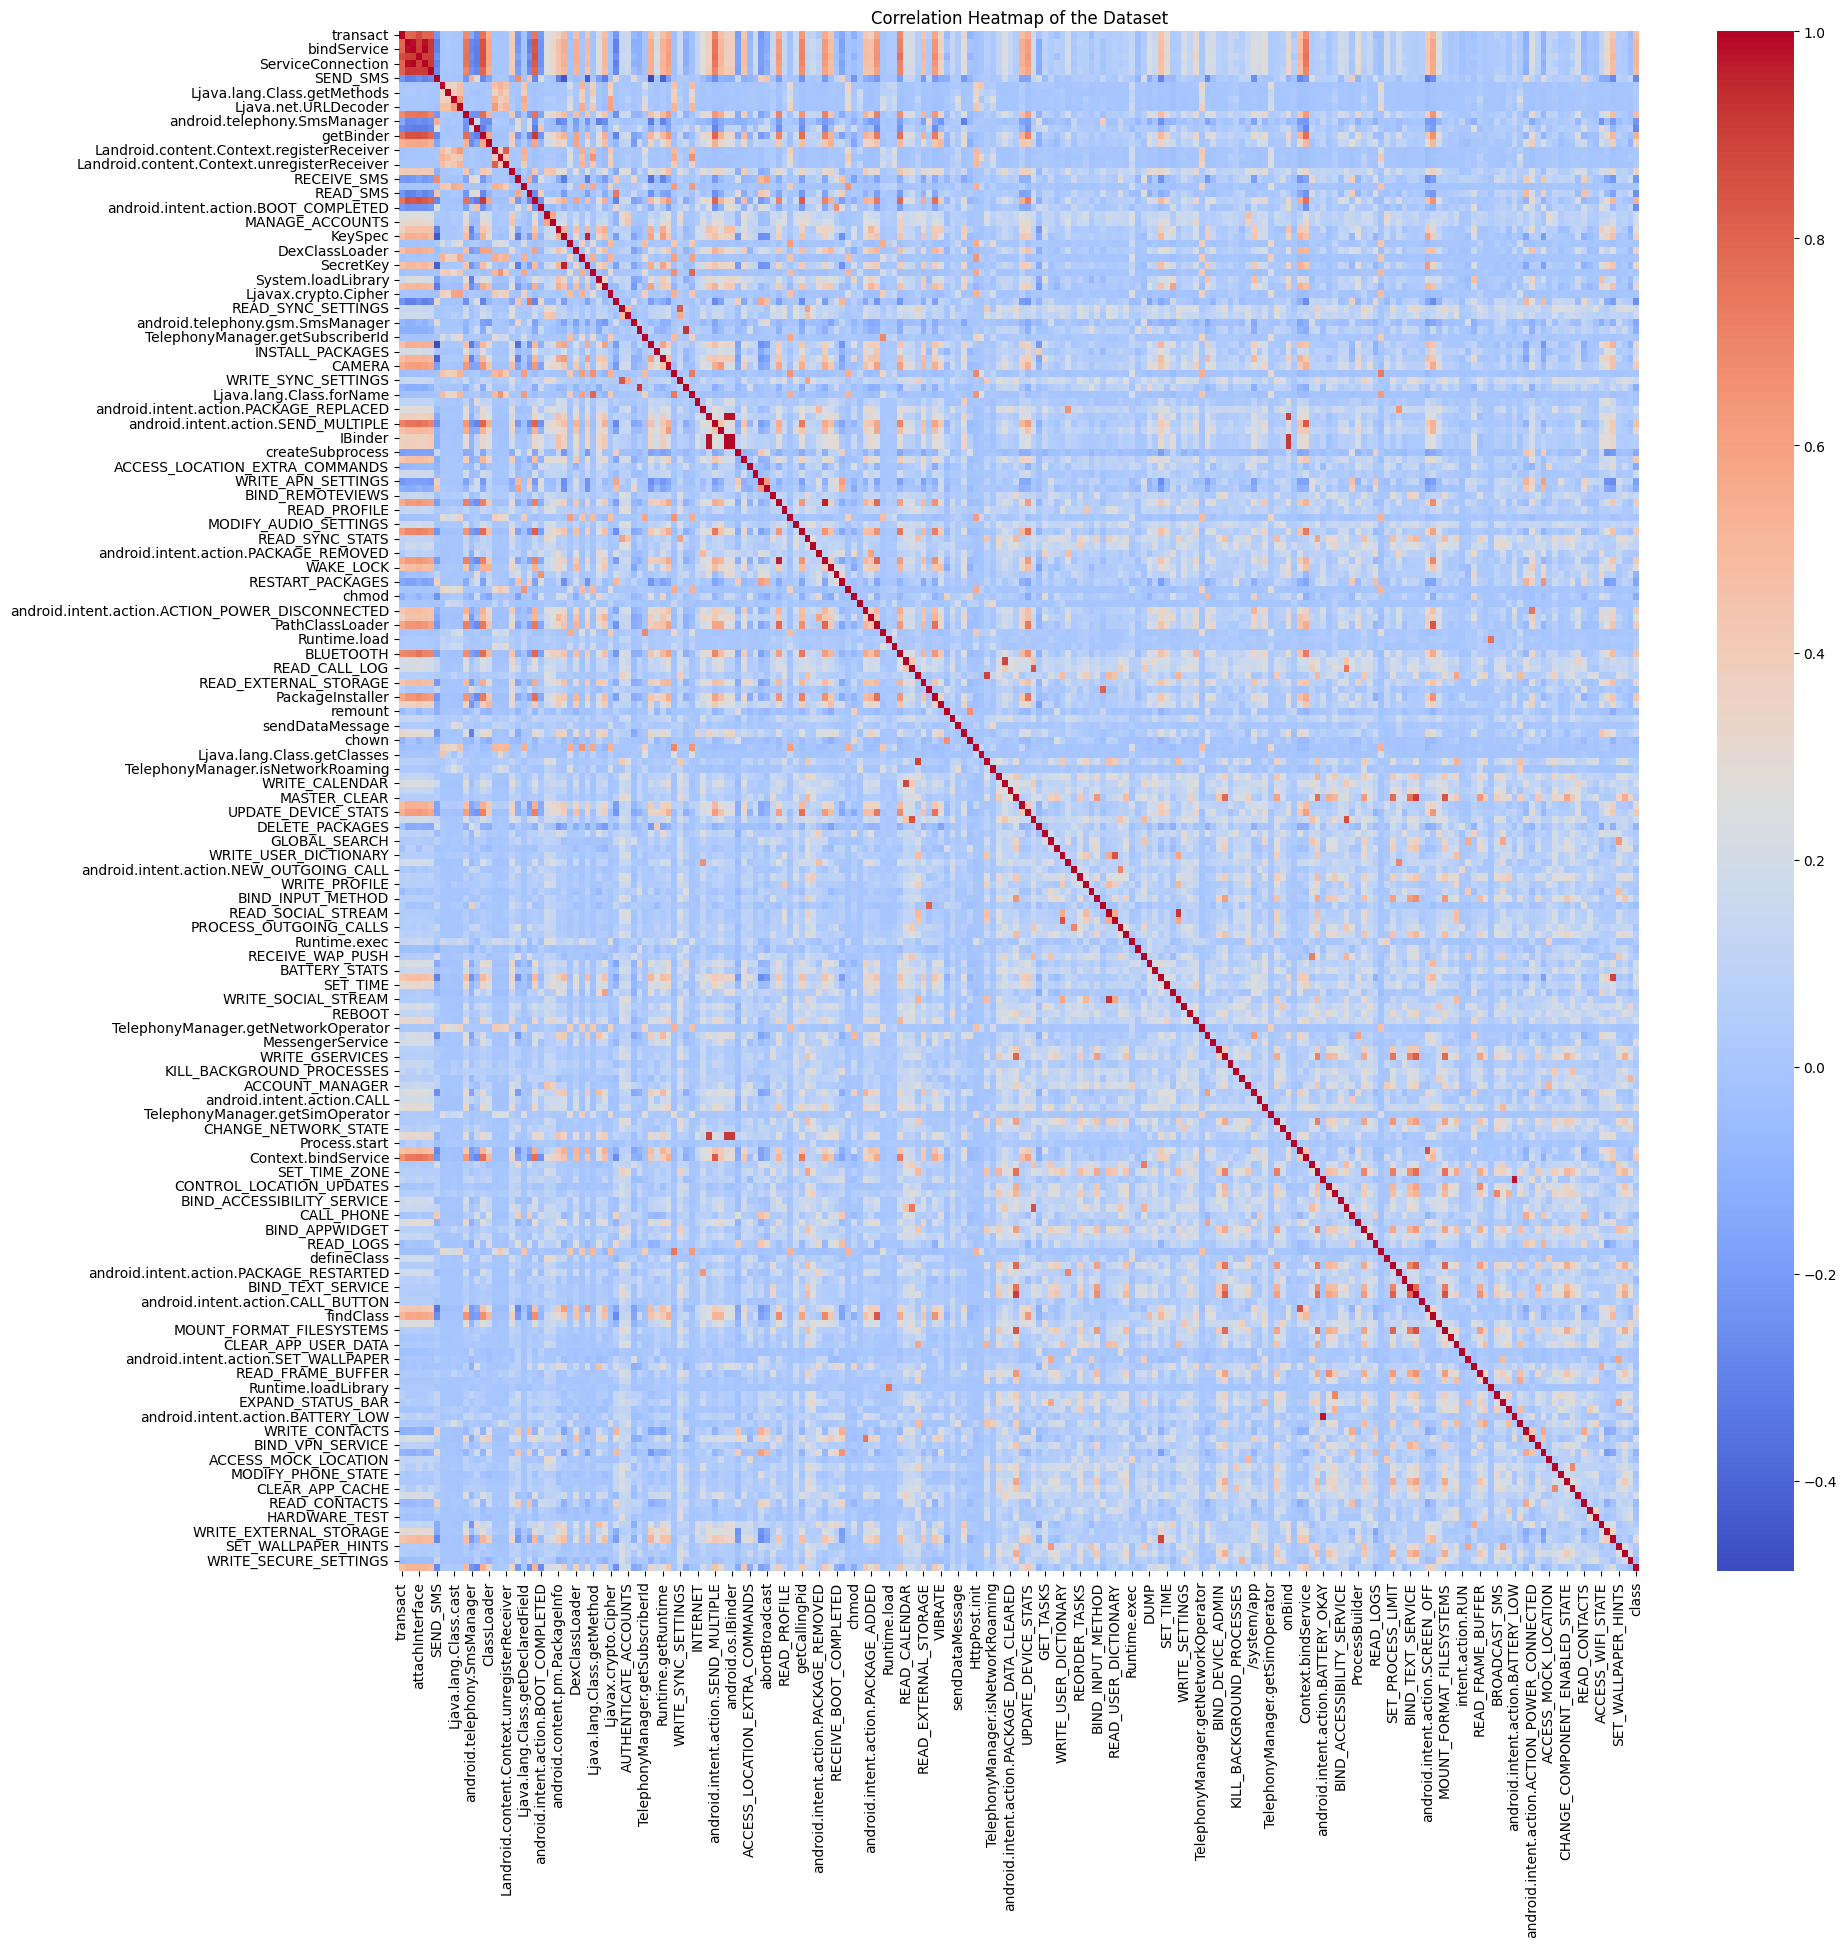

In [22]:
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(dataset.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of the Dataset")
plt.show()

# DATA VISUALISATION

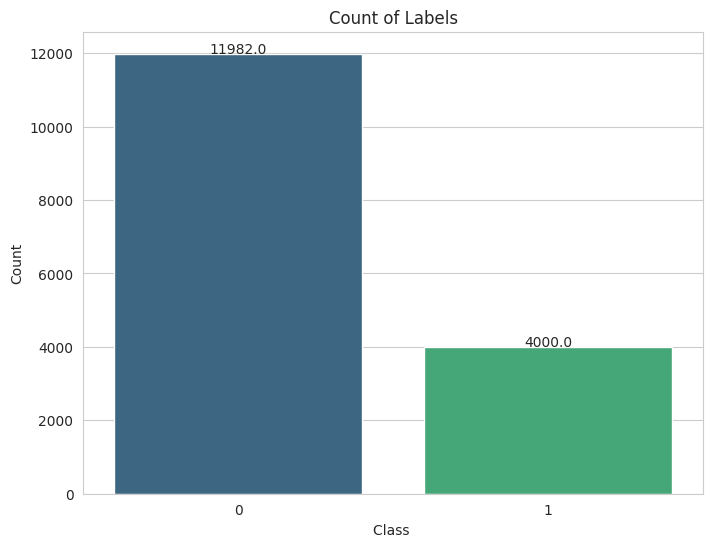

In [23]:
# Create a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Use sns.countplot to create the bar chart and capture the 'ax' object
ax = sns.countplot(x='class', data=dataset, palette='viridis')

# Annotate the count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Customize the plot (optional)
plt.xlabel('Class ')
plt.ylabel('Count')
plt.title('Count of Labels')

# Show the plot
plt.show()

<Axes: xlabel='class', ylabel='Density'>

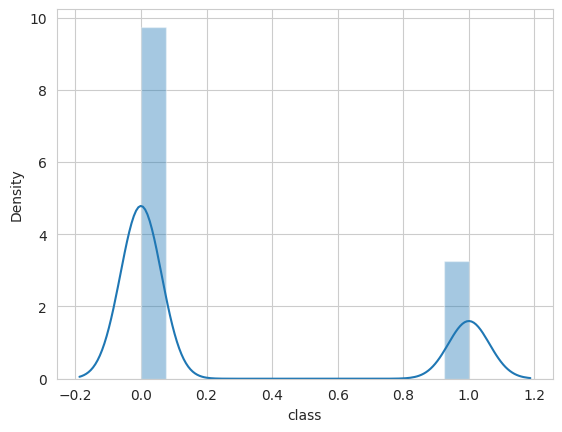

In [24]:
sns.distplot(dataset['class'])

# SPLITTING THE FEATURES AND TARGET VARIABLE

In [25]:
y = dataset[['class']]
X = dataset.drop(['class'],axis=1)

# SELECTING k=30 BEST FEATURES FROM DATASET

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
k_best = SelectKBest(score_func=f_classif, k=30)
X_selected = k_best.fit_transform(X, y)
selected_feature_indices = k_best.get_support()
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder',
       'android.content.pm.Signature', 'getBinder', 'ClassLoader',
       'GET_ACCOUNTS', 'getCallingUid', 'KeySpec', 'DexClassLoader',
       'SecretKey', 'android.intent.action.SEND', 'CAMERA',
       'android.intent.action.SEND_MULTIPLE', 'RECORD_AUDIO', 'NFC',
       'android.intent.action.TIME_SET', 'getCallingPid',
       'android.intent.action.TIMEZONE_CHANGED',
       'android.intent.action.ACTION_POWER_DISCONNECTED', 'PathClassLoader',
       'BLUETOOTH', 'PackageInstaller', 'UPDATE_DEVICE_STATS',
       'Context.bindService', 'android.intent.action.SCREEN_OFF', 'findClass'],
      dtype='object')


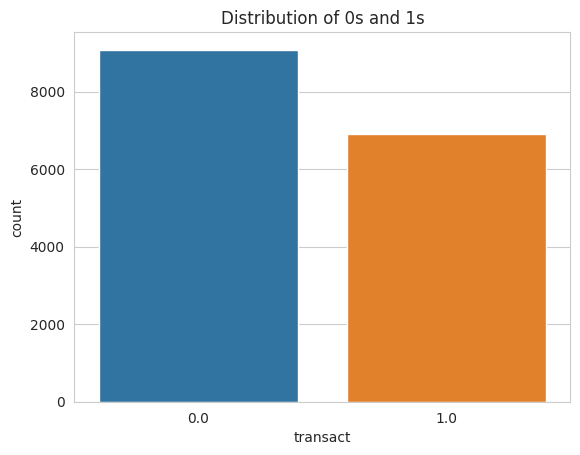

In [27]:
sns.countplot(x='transact', data=dataset)
plt.title('Distribution of 0s and 1s')
plt.show()

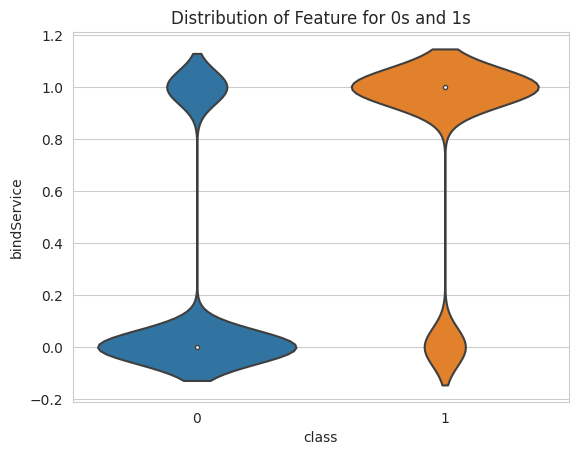

In [28]:
sns.violinplot(y='bindService', x='class', data=dataset)
plt.title('Distribution of Feature for 0s and 1s')
plt.show()

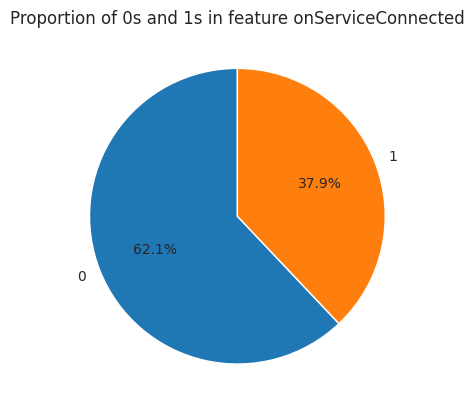

In [29]:
plt.pie(dataset['onServiceConnected'].value_counts(), labels=['0', '1'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of 0s and 1s in feature onServiceConnected')
plt.show()

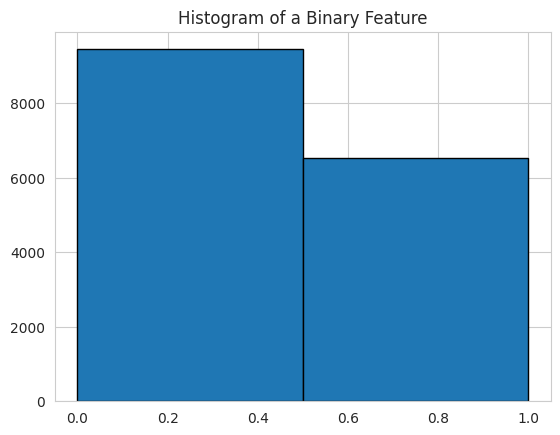

In [30]:
plt.hist(dataset['android.os.Binder'], bins=2, edgecolor='black')
plt.title('Histogram of a Binary Feature')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [32]:
y = dataset[['class']]
X = dataset[['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder',
       'android.content.pm.Signature', 'getBinder', 'ClassLoader',
       'GET_ACCOUNTS', 'getCallingUid', 'KeySpec', 'DexClassLoader',
       'SecretKey', 'android.intent.action.SEND', 'CAMERA',
       'android.intent.action.SEND_MULTIPLE', 'RECORD_AUDIO', 'NFC',
       'android.intent.action.TIME_SET', 'getCallingPid',
       'android.intent.action.TIMEZONE_CHANGED',
       'android.intent.action.ACTION_POWER_DISCONNECTED', 'PathClassLoader',
       'BLUETOOTH', 'PackageInstaller', 'UPDATE_DEVICE_STATS',
       'Context.bindService', 'android.intent.action.SCREEN_OFF', 'findClass']]

# SPLITTING THE DATASET INTO 80% TRAINING AND 20% TESTING


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# 1.) RANDOM FOREST CLASSIFIER

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred_rf = rf_model.predict(X_test)

In [38]:
print('The accuracy of Random Forest Classifier is: ' + str(accuracy_score(y_test, y_pred_rf)))

The accuracy of Random Forest Classifier is: 0.8701908038786362


<Axes: >

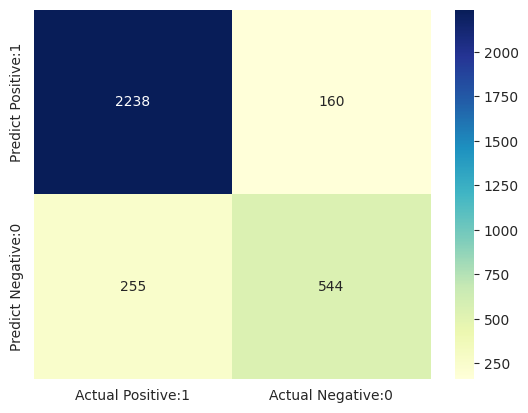

In [39]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [40]:
report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      2398
           1       0.77      0.68      0.72       799

    accuracy                           0.87      3197
   macro avg       0.84      0.81      0.82      3197
weighted avg       0.87      0.87      0.87      3197



In [41]:
# calculate the FPR and TPR for all thresholds of the classification
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test, probs)
rf_auc = metrics.roc_auc_score(y_test, probs)

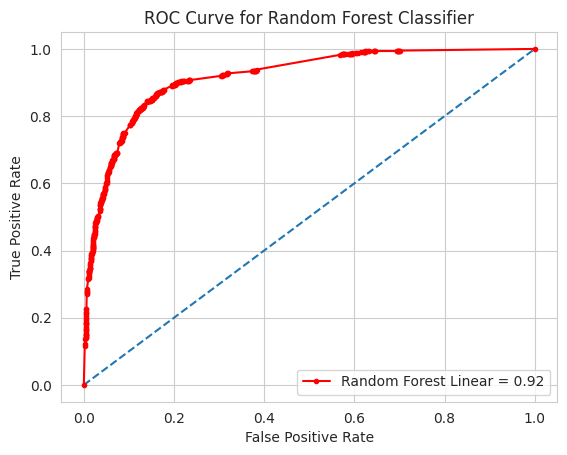

In [42]:
plt.title('ROC Curve for Random Forest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_fpr, rf_tpr, 'r', marker='.', label = 'Random Forest Linear = %0.2f' % rf_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 2.) GRADIENT BOOSTING CLASSIFIER

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [45]:
y_pred_gb = gradient_boosting.predict(X_test)

In [46]:
print('The accuracy of Gradient Boosting Classifier is: ' + str(accuracy_score(y_test, y_pred_gb)))

The accuracy of Gradient Boosting Classifier is: 0.8589302471066625


<Axes: >

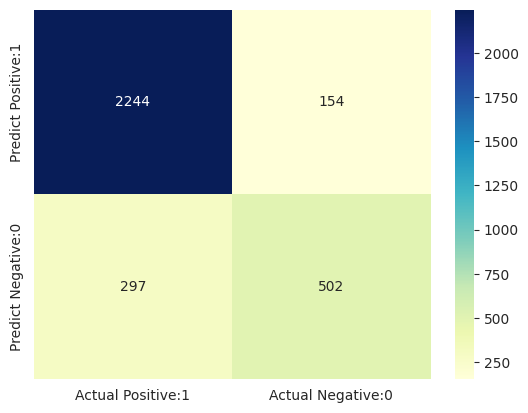

In [47]:
cm = confusion_matrix(y_test, y_pred_gb)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [48]:
report = classification_report(y_test, y_pred_gb)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2398
           1       0.77      0.63      0.69       799

    accuracy                           0.86      3197
   macro avg       0.82      0.78      0.80      3197
weighted avg       0.85      0.86      0.85      3197



In [49]:
# calculate the FPR and TPR for all thresholds of the classification
probs = gradient_boosting.predict_proba(X_test)
probs = probs[:, 1]
gb_fpr, gb_tpr, thresholds = metrics.roc_curve(y_test, probs)
gb_auc = metrics.roc_auc_score(y_test, probs)

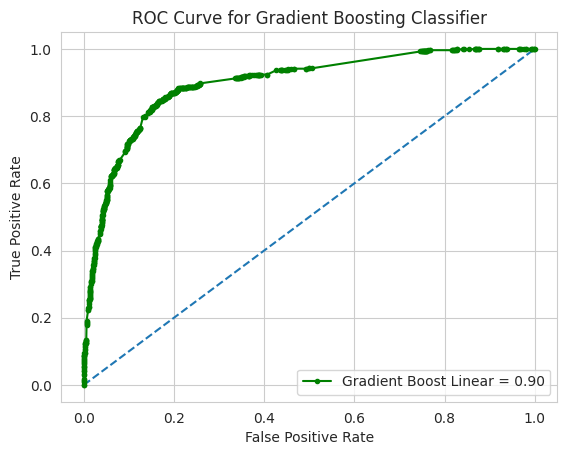

In [50]:
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(gb_fpr, gb_tpr, 'g', marker='.', label = 'Gradient Boost Linear = %0.2f' % gb_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3.) SUPPORT VECTOR MACHINE - Linear Kernel

In [51]:
from sklearn.svm import SVC

In [52]:
svm_classifier = SVC(gamma='auto', kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [53]:
y_pred_svm_lr = svm_classifier.predict(X_test)

In [54]:
print('The accuracy Support Vector Machine - Linear Kernel: ' + str(accuracy_score(y_test, y_pred_svm_lr)))

The accuracy Support Vector Machine - Linear Kernel: 0.841726618705036


<Axes: >

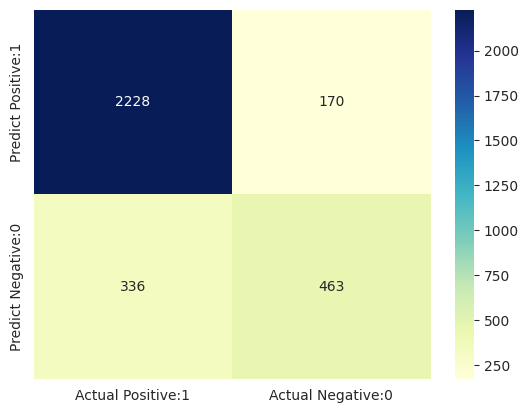

In [55]:
cm = confusion_matrix(y_test, y_pred_svm_lr)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [56]:
report = classification_report(y_test, y_pred_svm_lr)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2398
           1       0.73      0.58      0.65       799

    accuracy                           0.84      3197
   macro avg       0.80      0.75      0.77      3197
weighted avg       0.83      0.84      0.84      3197



In [57]:
# calculate the FPR and TPR for all thresholds of the classification
probs = svm_classifier.predict_proba(X_test)
probs = probs[:, 1]
svm_lr_fpr, svm_lr_tpr, thresholds = metrics.roc_curve(y_test, probs)
svm_lr_auc = metrics.roc_auc_score(y_test, probs)

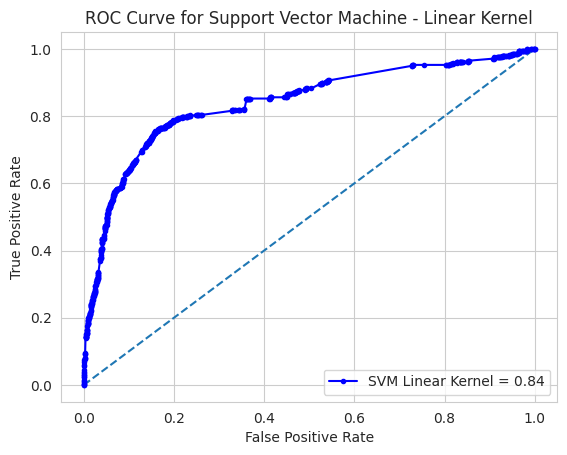

In [58]:
plt.title('ROC Curve for Support Vector Machine - Linear Kernel')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(svm_lr_fpr, svm_lr_tpr, 'b', marker='.', label = 'SVM Linear Kernel = %0.2f' % svm_lr_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 4.) SUPPORT VECTOR MACHINE - RBF KERNEL

In [59]:
from sklearn.svm import SVC

In [60]:
svm_classifier = SVC(gamma='auto', kernel='rbf', probability=True)
svm_classifier.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

In [61]:
y_pred_svm_rbf = svm_classifier.predict(X_test)

In [62]:
print('The accuracy of Support Vector Machine - RBF Kernel: ' + str(accuracy_score(y_test, y_pred_svm_rbf)))

The accuracy of Support Vector Machine - RBF Kernel: 0.8545511416953394


<Axes: >

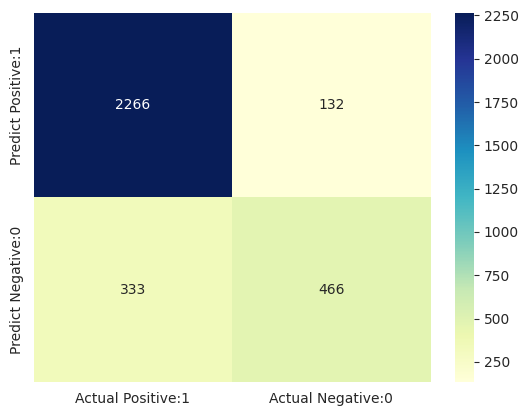

In [63]:
cm = confusion_matrix(y_test, y_pred_svm_rbf)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [64]:
report = classification_report(y_test, y_pred_svm_rbf)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      2398
           1       0.78      0.58      0.67       799

    accuracy                           0.85      3197
   macro avg       0.83      0.76      0.79      3197
weighted avg       0.85      0.85      0.85      3197



In [65]:
# calculate the FPR and TPR for all thresholds of the classification
probs = svm_classifier.predict_proba(X_test)
probs = probs[:, 1]
svm_rbf_fpr, svm_rbf_tpr, thresholds = metrics.roc_curve(y_test, probs)
svm_rbf_auc = metrics.roc_auc_score(y_test, probs)

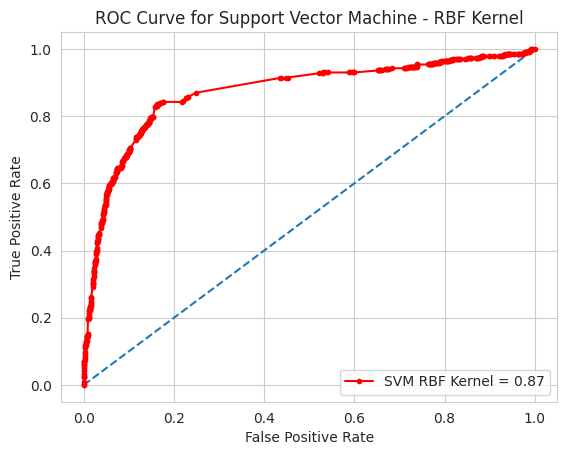

In [66]:
plt.title('ROC Curve for Support Vector Machine - RBF Kernel')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(svm_rbf_fpr, svm_rbf_tpr, 'r', marker='.', label = 'SVM RBF Kernel = %0.2f' % svm_rbf_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 5.) K-NEAREST NEIGHBORS

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
# K-Nearest Neighbours
best_accuracy = 0
best_k = 0
accuracy_rate=[]
for k in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    print("For k = "+ str(k))
    print('The accuracy is ' + str(accuracy_score(y_test, y_pred_knn)))
    accuracy_rate.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
print(f"The best K value is: {best_k} with an accuracy of {best_accuracy:.4f}")

For k = 1
The accuracy is 0.8579918673756647
For k = 2
The accuracy is 0.8376603065373788
For k = 3
The accuracy is 0.8561151079136691
For k = 4
The accuracy is 0.8489208633093526
For k = 5
The accuracy is 0.8598686268376603
For k = 6
The accuracy is 0.8595558335939943
For k = 7
The accuracy is 0.8626837660306538
For k = 8
The accuracy is 0.8604942133249922
For k = 9
The accuracy is 0.8589302471066625
For k = 10
The accuracy is 0.8598686268376603
For k = 11
The accuracy is 0.8626837660306538
For k = 12
The accuracy is 0.8592430403503284
For k = 13
The accuracy is 0.8623709727869878
For k = 14
The accuracy is 0.861119799812324
For k = 15
The accuracy is 0.8608070065686582
For k = 16
The accuracy is 0.8608070065686582
For k = 17
The accuracy is 0.8595558335939943
For k = 18
The accuracy is 0.8570534876446668
For k = 19
The accuracy is 0.8583046606193306
For k = 20
The accuracy is 0.8554895214263372
For k = 21
The accuracy is 0.8589302471066625
For k = 22
The accuracy is 0.857053487644666

In [69]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [70]:
print('The accuracy of K-Nearest Neighbors is: ' + str(accuracy_score(y_test, y_pred_knn)))
print("Best K value is: "+str(best_k))

The accuracy of K-Nearest Neighbors is: 0.8626837660306538
Best K value is: 7


Text(0, 0.5, 'Accuracy rate')

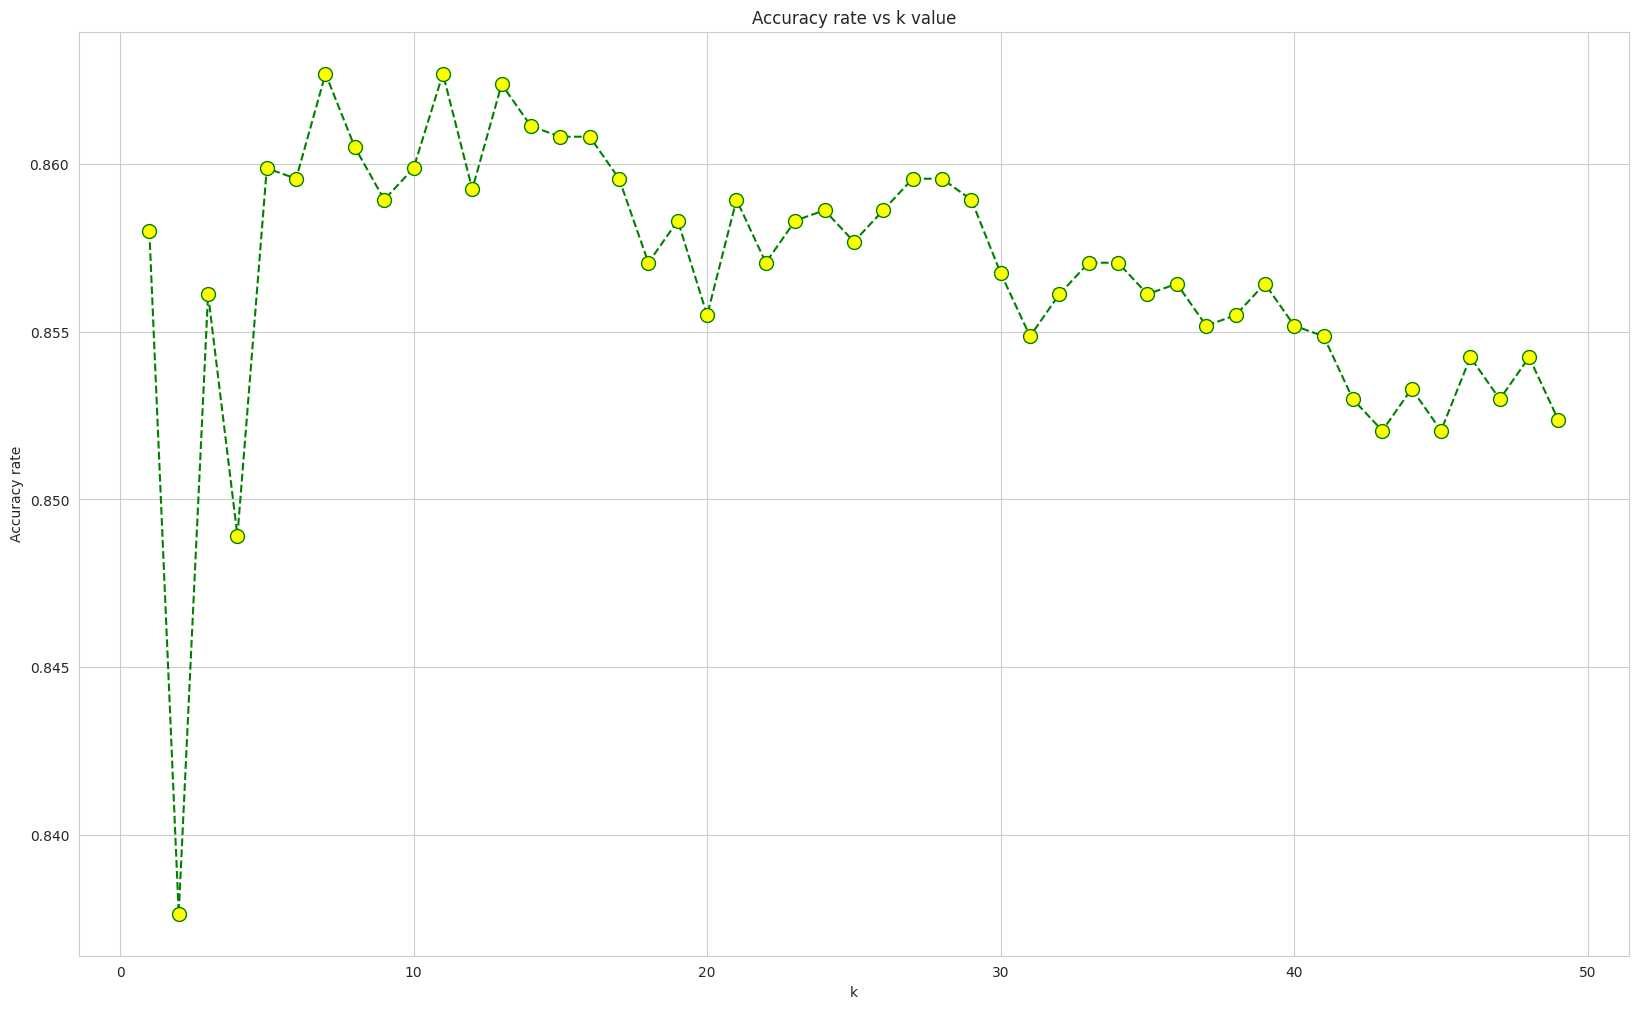

In [71]:
plt.figure(figsize=(20,12))
plt.plot(range(1,50),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

<Axes: >

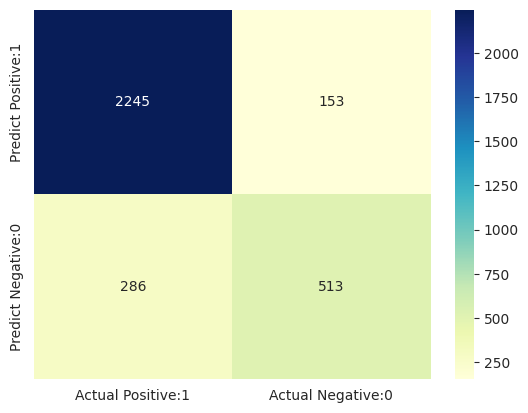

In [72]:
cm = confusion_matrix(y_test, y_pred_knn)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [73]:
report = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      2398
           1       0.77      0.64      0.70       799

    accuracy                           0.86      3197
   macro avg       0.83      0.79      0.81      3197
weighted avg       0.86      0.86      0.86      3197



In [74]:
# calculate the FPR and TPR for all thresholds of the classification
probs = knn_model.predict_proba(X_test)
probs = probs[:, 1]
knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_test, probs)
knn_auc = metrics.roc_auc_score(y_test, probs)

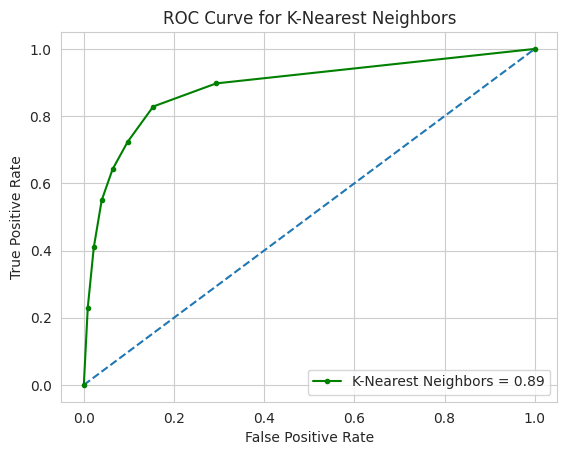

In [75]:
plt.title('ROC Curve for K-Nearest Neighbors')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_fpr, knn_tpr, 'g', marker='.', label = 'K-Nearest Neighbors = %0.2f' % knn_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 6.) MULTI-LAYER PERCEPTRON CLASSIFIER

In [76]:
from sklearn.neural_network import MLPClassifier

In [77]:
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train)

MLPClassifier()

In [78]:
y_pred_mlp = mlp_classifier.predict(X_test)

In [79]:
print('The accuracy of Multi Layer Perceptron Classifier is: ' + str(accuracy_score(y_test, y_pred_mlp)))

The accuracy of Multi Layer Perceptron Classifier is: 0.8654989052236471


<Axes: >

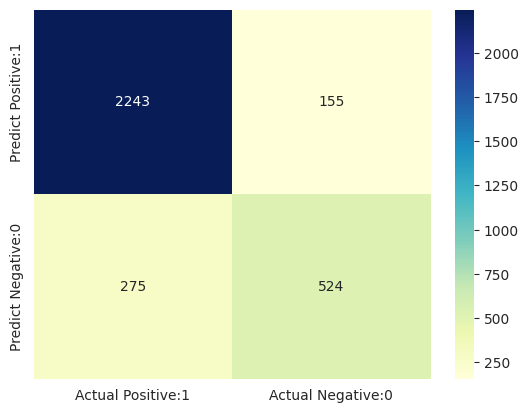

In [80]:
cm = confusion_matrix(y_test, y_pred_mlp)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [81]:
report = classification_report(y_test, y_pred_mlp)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      2398
           1       0.77      0.66      0.71       799

    accuracy                           0.87      3197
   macro avg       0.83      0.80      0.81      3197
weighted avg       0.86      0.87      0.86      3197



In [82]:
# calculate the FPR and TPR for all thresholds of the classification
probs = mlp_classifier.predict_proba(X_test)
probs = probs[:, 1]
mlp_fpr, mlp_tpr, thresholds = metrics.roc_curve(y_test, probs)
mlp_auc = metrics.roc_auc_score(y_test, probs)

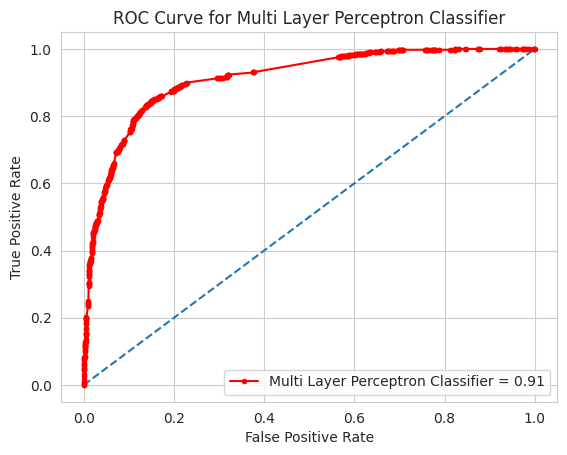

In [83]:
plt.title('ROC Curve for Multi Layer Perceptron Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mlp_fpr, mlp_tpr, 'r', marker='.', label = 'Multi Layer Perceptron Classifier = %0.2f' % mlp_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 7.) GAUSSIAN NAIVE-BAYES

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [86]:
y_pred_nb = naive_bayes.predict(X_test)

In [87]:
print('The accuracy of Gaussian Naive-Bayes is: ' + str(accuracy_score(y_test, y_pred_nb)))

The accuracy of Gaussian Naive-Bayes is: 0.8079449483891148


<Axes: >

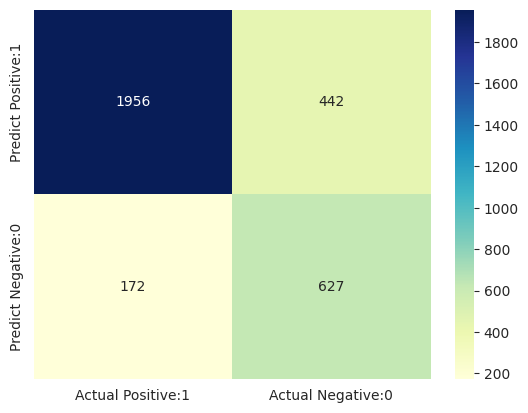

In [88]:
cm = confusion_matrix(y_test, y_pred_nb)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [89]:
report = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.86      2398
           1       0.59      0.78      0.67       799

    accuracy                           0.81      3197
   macro avg       0.75      0.80      0.77      3197
weighted avg       0.84      0.81      0.82      3197



In [90]:
# calculate the FPR and TPR for all thresholds of the classification
probs = naive_bayes.predict_proba(X_test)
probs = probs[:, 1]
nb_fpr, nb_tpr, thresholds = metrics.roc_curve(y_test, probs)
nb_auc = metrics.roc_auc_score(y_test, probs)

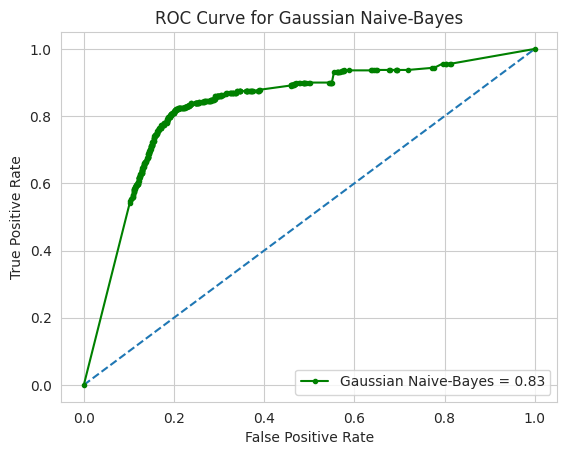

In [91]:
plt.title('ROC Curve for Gaussian Naive-Bayes')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nb_fpr, nb_tpr, 'g', marker='.', label = 'Gaussian Naive-Bayes = %0.2f' % nb_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 8.) LOGISTIC REGRESSION

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [94]:
y_pred_lr = logistic_regression.predict(X_test)

In [95]:
print('The accuracy of Logistic Regression is: ' + str(accuracy_score(y_test, y_pred_lr)))

The accuracy of Logistic Regression is: 0.8448545511416954


<Axes: >

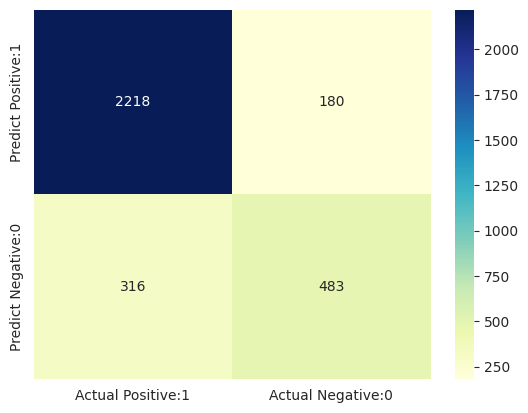

In [96]:
cm = confusion_matrix(y_test, y_pred_lr)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [97]:
report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      2398
           1       0.73      0.60      0.66       799

    accuracy                           0.84      3197
   macro avg       0.80      0.76      0.78      3197
weighted avg       0.84      0.84      0.84      3197



In [98]:
# calculate the FPR and TPR for all thresholds of the classification
probs = logistic_regression.predict_proba(X_test)
probs = probs[:, 1]
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, probs)
lr_auc = metrics.roc_auc_score(y_test, probs)

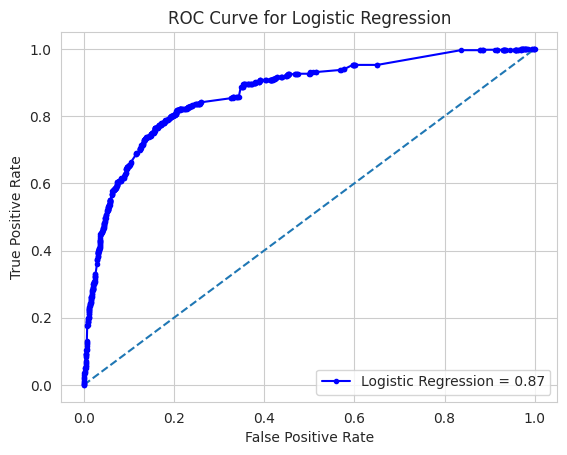

In [99]:
plt.title('ROC Curve for Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, 'b', marker='.', label = 'Logistic Regression = %0.2f' % lr_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 9.) DECISION TREE CLASSSIFIER

In [100]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [101]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [102]:
y_pred_dt = decision_tree.predict(X_test)

In [103]:
print('The accuracy of Decision Tree Classifier is: ' + str(accuracy_score(y_test, y_pred_dt)))

The accuracy of Decision Tree Classifier is: 0.8461057241163591


<Axes: >

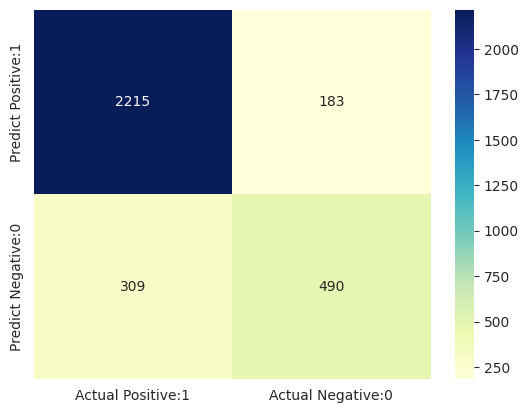

In [104]:
cm = confusion_matrix(y_test, y_pred_dt)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [105]:
report = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      2398
           1       0.73      0.61      0.67       799

    accuracy                           0.85      3197
   macro avg       0.80      0.77      0.78      3197
weighted avg       0.84      0.85      0.84      3197



In [106]:
# calculate the FPR and TPR for all thresholds of the classification
probs = decision_tree.predict_proba(X_test)
probs = probs[:, 1]
dt_fpr, dt_tpr, thresholds = metrics.roc_curve(y_test, probs)
dt_auc = metrics.roc_auc_score(y_test, probs)

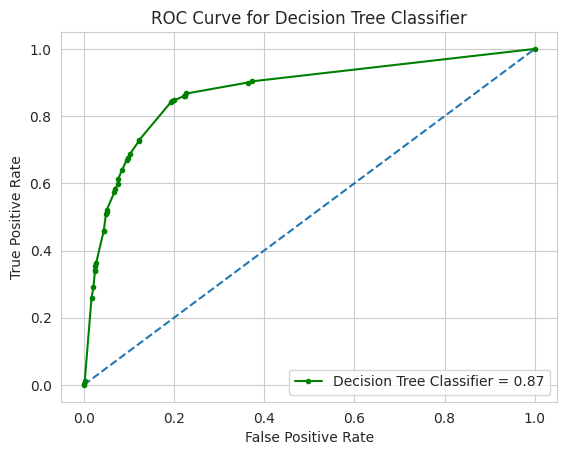

In [107]:
plt.title('ROC Curve for Decision Tree Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_fpr, dt_tpr, 'g', marker='.', label = 'Decision Tree Classifier = %0.2f' % dt_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

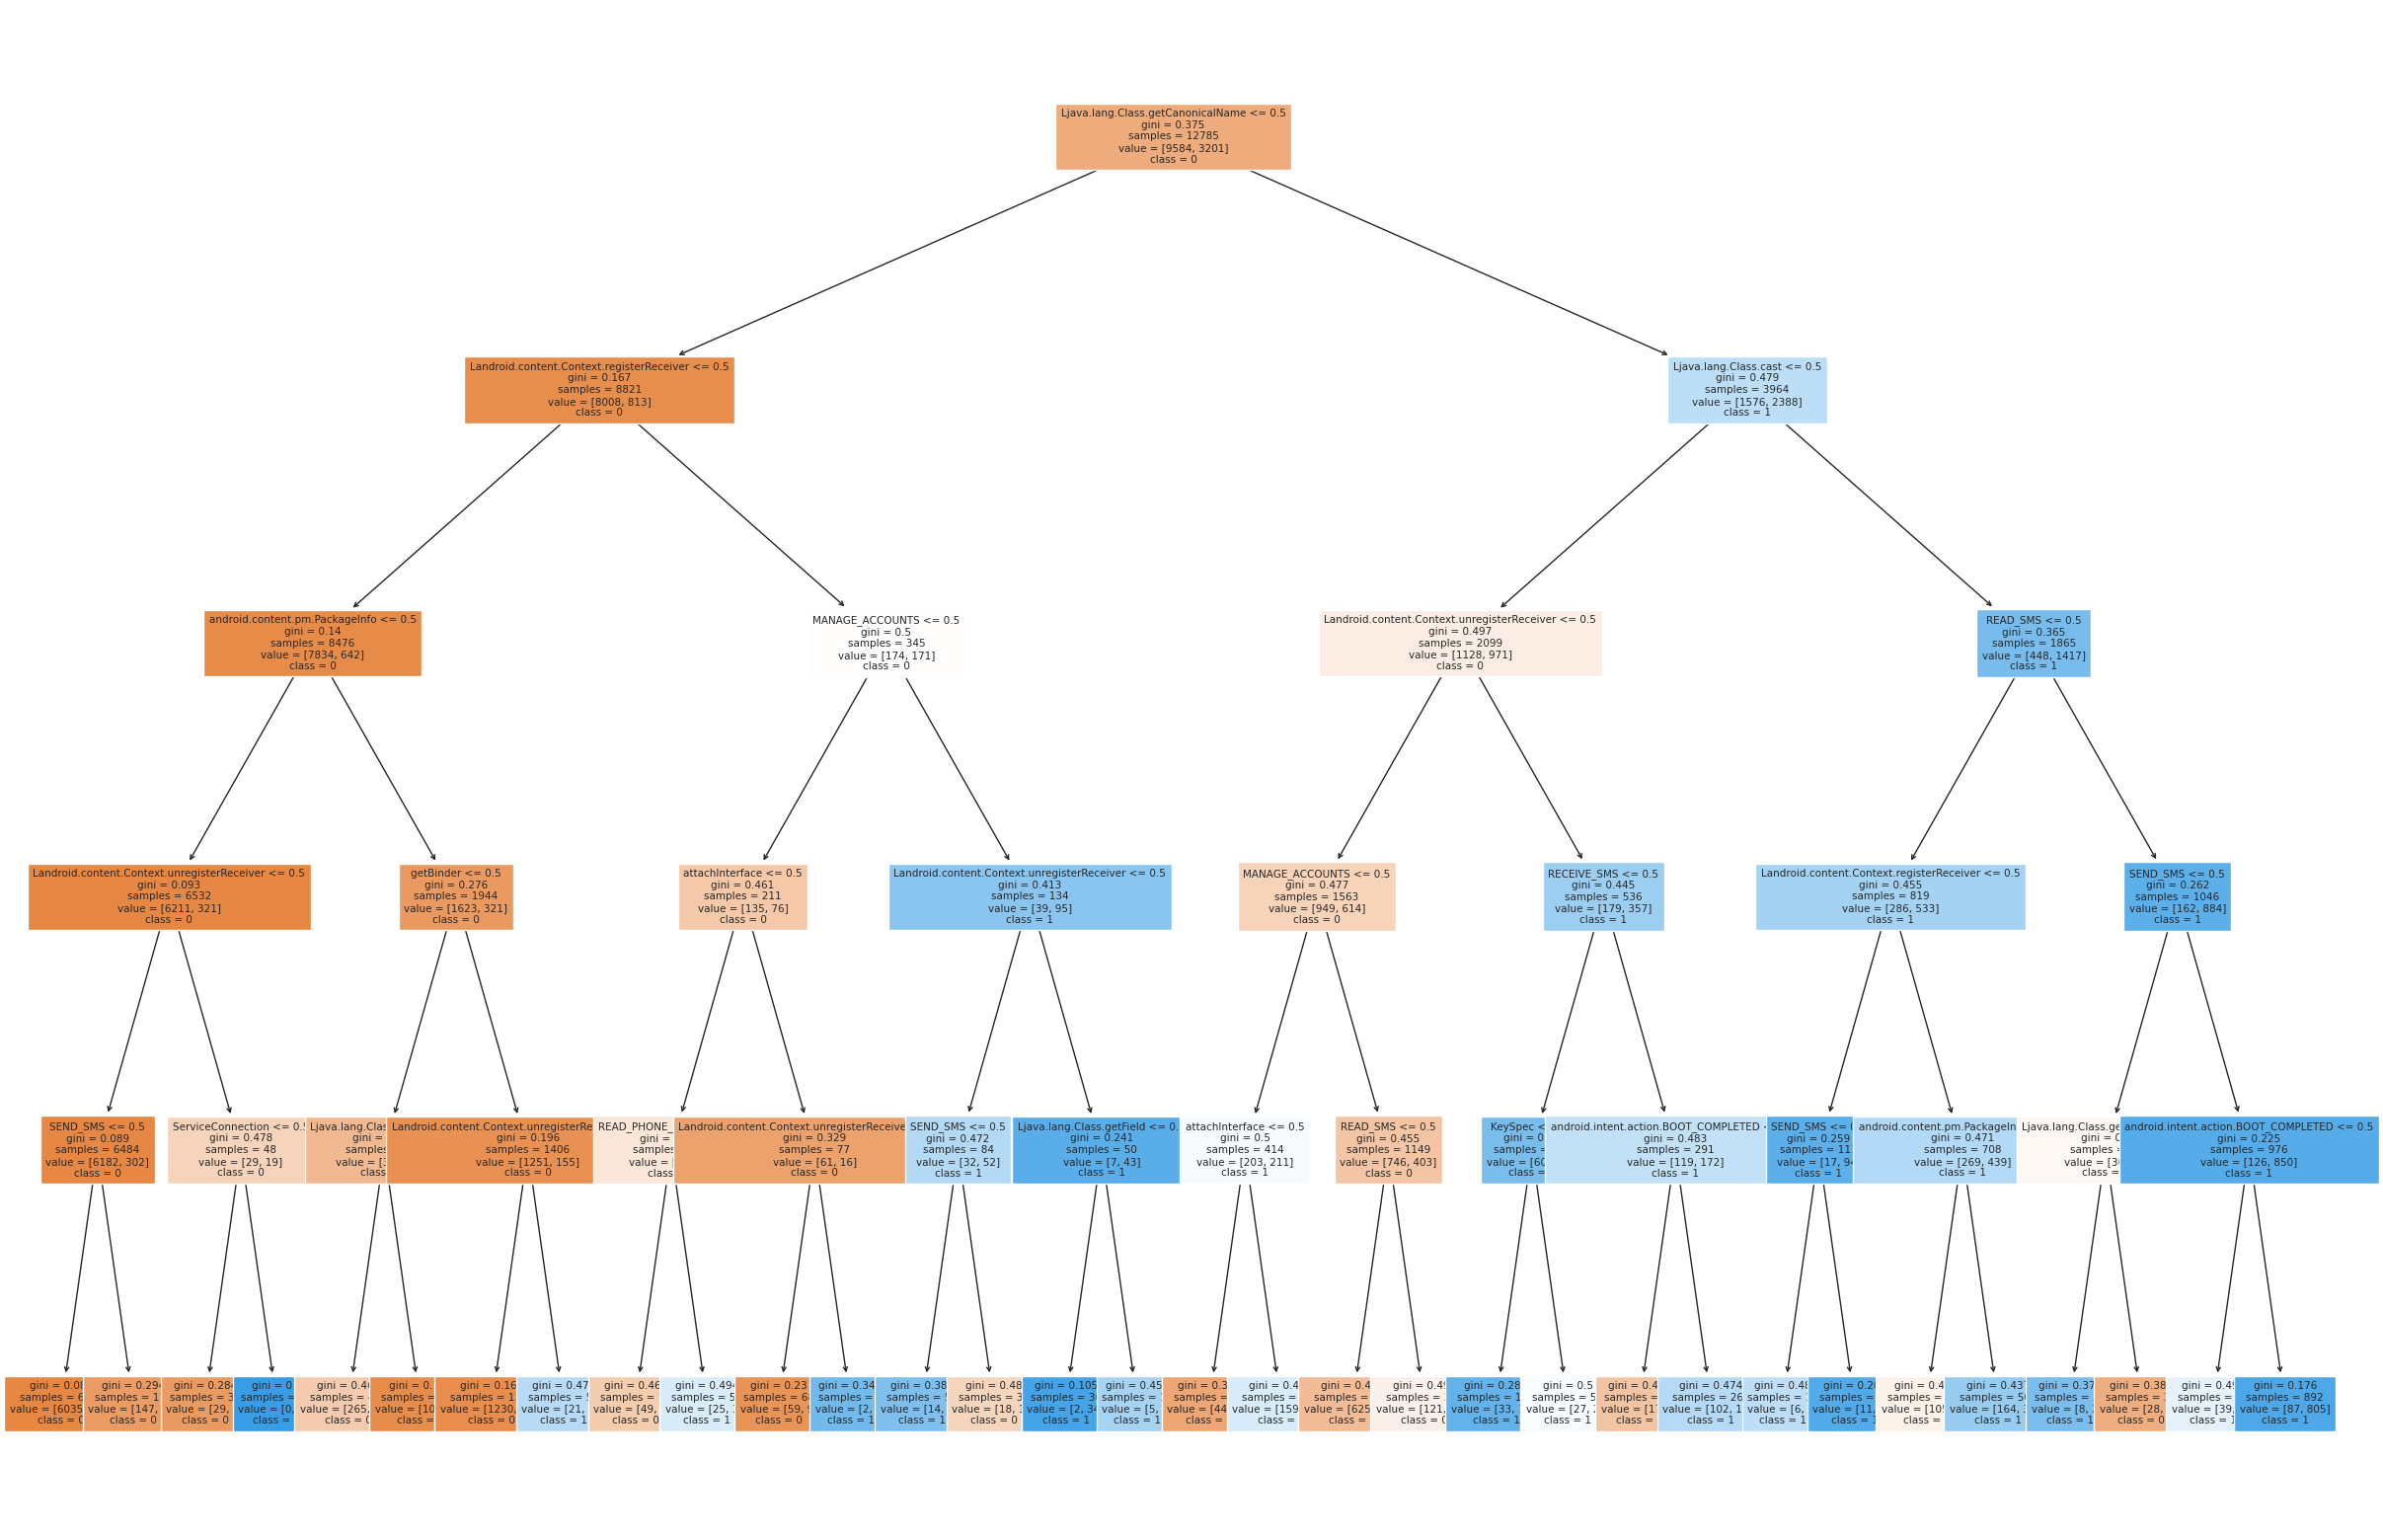

In [108]:
tree = plt.figure(figsize=(30,20))
decision_tree = plot_tree(decision_tree, filled=True, feature_names=dataset.columns, class_names=["0", "1"], fontsize=7.5)

# 10.) ADAPTIVE BOOSTING CLASSIFIER

In [109]:
from sklearn.ensemble import AdaBoostClassifier

In [110]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0, random_state=42)
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [111]:
y_pred_adaboost = adaboost_classifier.predict(X_test)

In [112]:
print('The accuracy of Adaptive Boosting Classifier is: ' + str(accuracy_score(y_test, y_pred_adaboost)))

The accuracy of Adaptive Boosting Classifier is: 0.8382858930247107


<Axes: >

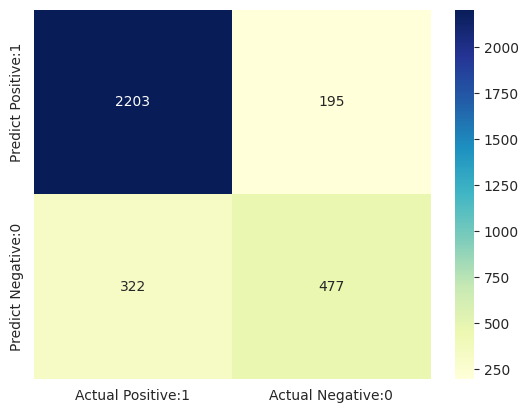

In [113]:
cm = confusion_matrix(y_test, y_pred_adaboost)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [114]:
report = classification_report(y_test, y_pred_adaboost)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      2398
           1       0.71      0.60      0.65       799

    accuracy                           0.84      3197
   macro avg       0.79      0.76      0.77      3197
weighted avg       0.83      0.84      0.83      3197



In [115]:
# calculate the FPR and TPR for all thresholds of the classification
probs = adaboost_classifier.predict_proba(X_test)
probs = probs[:, 1]
ab_fpr, ab_tpr, thresholds = metrics.roc_curve(y_test, probs)
ab_auc = metrics.roc_auc_score(y_test, probs)

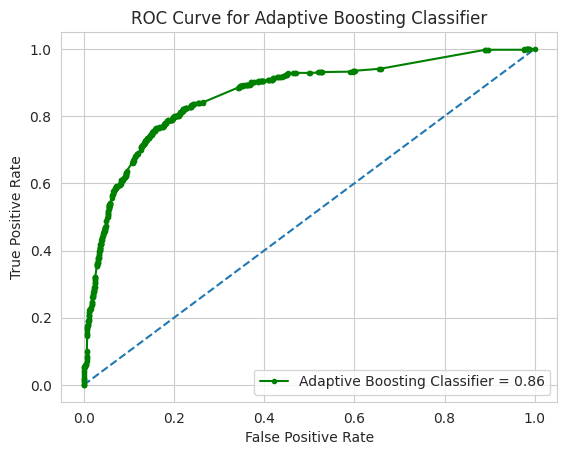

In [116]:
plt.title('ROC Curve for Adaptive Boosting Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(ab_fpr, ab_tpr, 'g', marker='.', label = 'Adaptive Boosting Classifier = %0.2f' % ab_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 11.) XGBOOST CLASSIFIER

In [117]:
import xgboost as xgb

In [118]:
XGB_clf = xgb.XGBClassifier(colsample_bytree= 0.94, eta= 0.25000000000000006, gamma= 5, min_child_weight= 1.5, subsample= 0.94,objective = "binary:logistic")
XGB_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.94, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25000000000000006,
              eval_metric=None, feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=1.5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [119]:
y_pred_XGB = XGB_clf.predict(X_test)

In [120]:
print('The accuracy of XGBoost Classifier is: ' + str(accuracy_score(y_test, y_pred_XGB)))

The accuracy of XGBoost Classifier is: 0.8570534876446668


<Axes: >

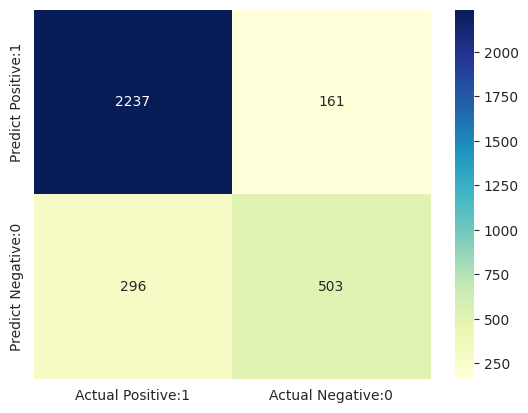

In [121]:
cm = confusion_matrix(y_test, y_pred_XGB)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [122]:
report = classification_report(y_test, y_pred_XGB)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      2398
           1       0.76      0.63      0.69       799

    accuracy                           0.86      3197
   macro avg       0.82      0.78      0.80      3197
weighted avg       0.85      0.86      0.85      3197



In [123]:
# calculate the FPR and TPR for all thresholds of the classification
probs = XGB_clf.predict_proba(X_test)
probs = probs[:, 1]
xgb_fpr, xgb_tpr, thresholds = metrics.roc_curve(y_test, probs)
xgb_auc = metrics.roc_auc_score(y_test, probs)

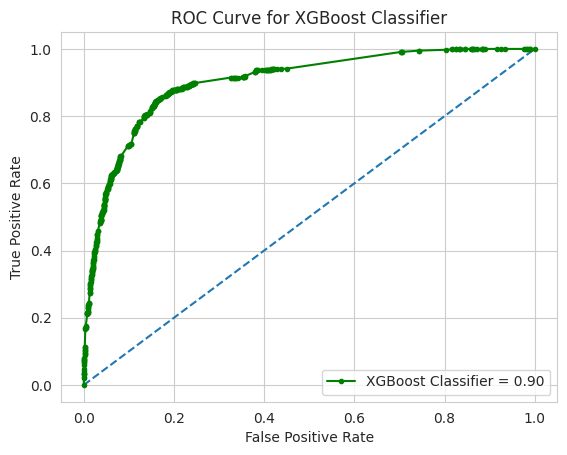

In [124]:
plt.title('ROC Curve for XGBoost Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(xgb_fpr, xgb_tpr, 'g', marker='.', label = 'XGBoost Classifier = %0.2f' % xgb_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()